# Exp8
 Create an ARIMA model for time series forecasting.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-a7250fd66102>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = stock_data['Close'].resample('M').mean()
<ipython-input-1-a7250fd66102>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')


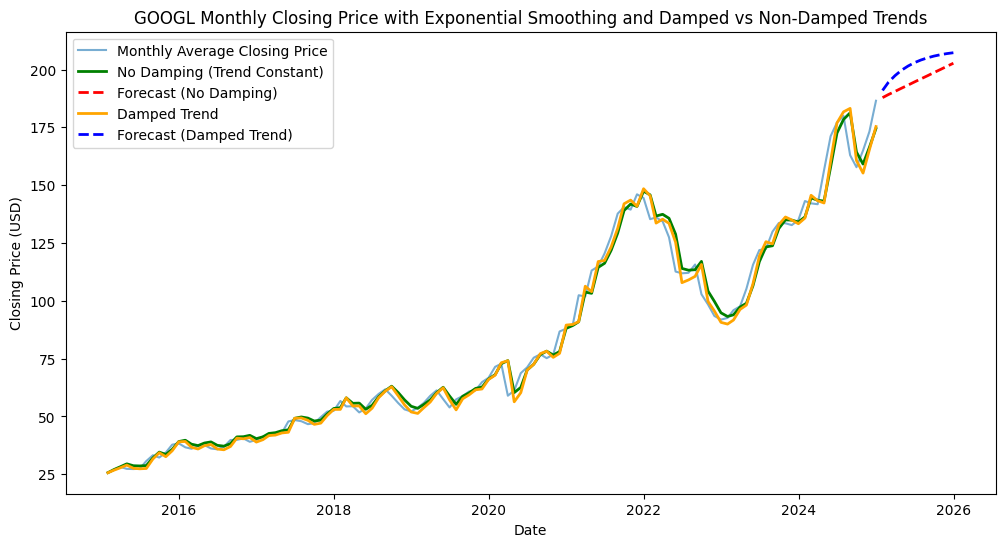

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Download historical stock data for Google (GOOGL)
ticker = "GOOGL"
stock_data = yf.download(ticker, start="2015-01-01", end="2025-01-01")

# Aggregating data to monthly frequency (using mean closing price for aggregation)
monthly_data = stock_data['Close'].resample('M').mean()

# Apply Exponential Smoothing without damped trend
model_no_damping = ExponentialSmoothing(monthly_data, trend='add', seasonal=None, damped_trend=False)
fit_model_no_damping = model_no_damping.fit()
monthly_data_smooth_no_damping = fit_model_no_damping.fittedvalues
forecast_no_damping = fit_model_no_damping.forecast(steps=12)

# Apply Exponential Smoothing with damped trend
model_damping = ExponentialSmoothing(monthly_data, trend='add', seasonal=None, damped_trend=True)
fit_model_damping = model_damping.fit()
monthly_data_smooth_damping = fit_model_damping.fittedvalues
forecast_damping = fit_model_damping.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)

# Plot the smoothed values without damped trend
plt.plot(monthly_data_smooth_no_damping, label='No Damping (Trend Constant)', color='green', linewidth=2)

# Plot the forecasted values without damped trend
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
plt.plot(forecast_index, forecast_no_damping, label='Forecast (No Damping)', color='red', linestyle='--', linewidth=2)

# Plot the smoothed values with damped trend
plt.plot(monthly_data_smooth_damping, label='Damped Trend', color='orange', linewidth=2)

# Plot the forecasted values with damped trend
plt.plot(forecast_index, forecast_damping, label='Forecast (Damped Trend)', color='blue', linestyle='--', linewidth=2)

# Titles and labels
plt.title('GOOGL Monthly Closing Price with Exponential Smoothing and Damped vs Non-Damped Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()

# Show the plot
plt.show()
